# Bioinformatics and Network Medicine  2023-24

# NetworkX

In this lab we will se how to use Python library `NetworkX`, which is a must-to-know when it comes to graph with python. This library allows you to create graphs from scratch or import them from files, to perform operations on graphs, centrality measures computation and also visualizations. We will first go through the basics to later dive into more complicated (but not too much :)) concepts.

networkx_logo.svg

# Installation

If you don’t have NetworkX installed, just run the line below (remove
the ! if you are installing from a terminal/powershell). We will also need additional libraries for this tutorial.

In [202]:
# Comment the following line to make this cell executable.
# %%script false --no-raise-error

# Remove `!` if you are installing from a terminal/powershell.
!pip install networkx
!pip install scipy
!pip install matplotlib
!pip install pandas

DEPRECATION: Loading egg at c:\users\neusv\appdata\local\programs\python\python311\lib\site-packages\matlabengine-24.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\users\neusv\appdata\local\programs\python\python311\lib\site-packages\matlabengine-24.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\users\neusv\appdata\local\programs\python\python311\lib\site-packages\matlabengine-24.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\users\neusv\appdata\local\programs\python\python311\lib\site-packages\matlabengine-24.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


or, for **Conda** users

# NetworkX Basics

In this section we will see how to use NetworkX to easily create, load and handle graphs. We will create both directed and indirected graphs.

## Initialize an empty graph

Graph named 'my_awesome_graph' with 0 nodes and 0 edges


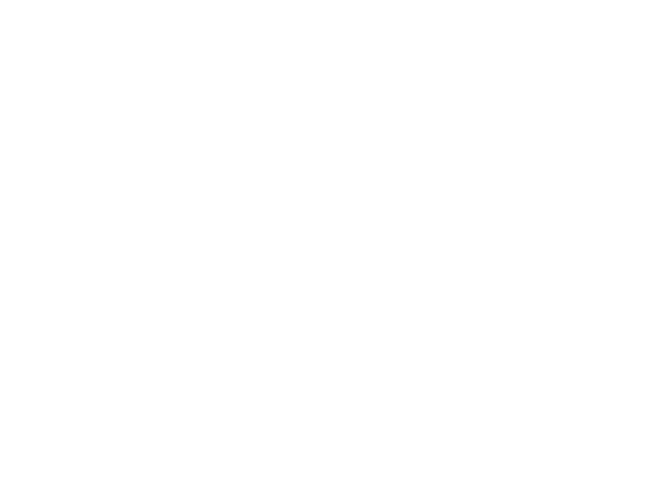

In [203]:
import networkx as nx

G = nx.Graph(name = "my_awesome_graph") # Undirected Graph!
print(G)                                # Replaces `nx.info(G)` now deprecated.

nx.draw(G, with_labels=True, font_weight='bold')

## Adding nodes

Graph named 'my_awesome_graph' with 1 nodes and 0 edges
Graph named 'my_awesome_graph' with 7 nodes and 0 edges


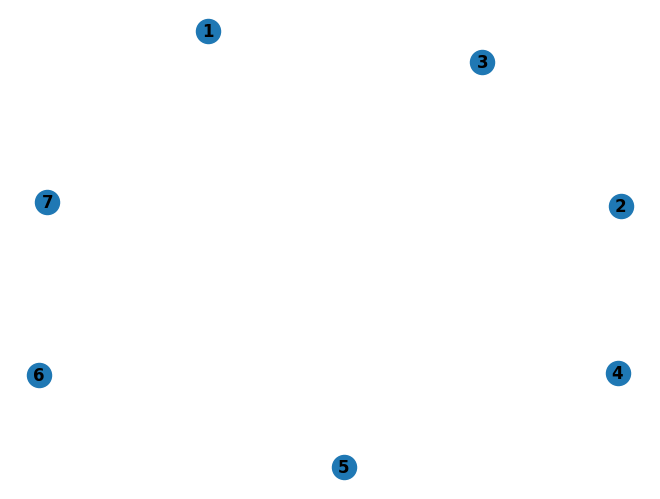

In [204]:
# One node at a time.
G.add_node(1)
print(G)

# Multiple nodes at a time.
nodes_to_add = [2,3,4,5,6,7]
G.add_nodes_from(nodes_to_add)
print(G)

nx.draw(G, with_labels=True, font_weight='bold')

## Adding edges

The edges are represented as tuple of nodes (e.g. `(1,3)` is the edge between node 1 and 3). Then, we can add multiple edges at once using a _list of tuples_, like: `[(1,2), (2,3), ...]`

Graph named 'my_awesome_graph' with 7 nodes and 6 edges


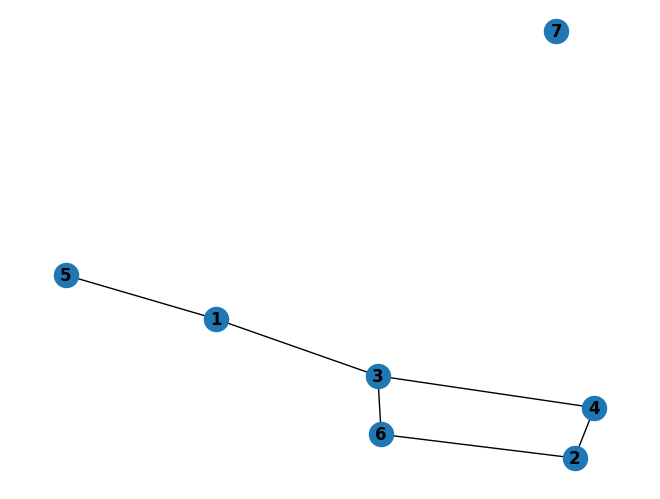

In [205]:
# One edge at a time.
G.add_edge(1,3)

# Multiple edges at once.
edges_to_add = [(1,5), (2,4), (2,6), (3,4), (3,6)]
G.add_edges_from(edges_to_add)
print(G)

nx.draw(G, with_labels=True, font_weight='bold')

**Q1:**
What happens if we add an edge between two nodes that are not present in the graph?

Graph named 'my_awesome_graph' with 9 nodes and 7 edges


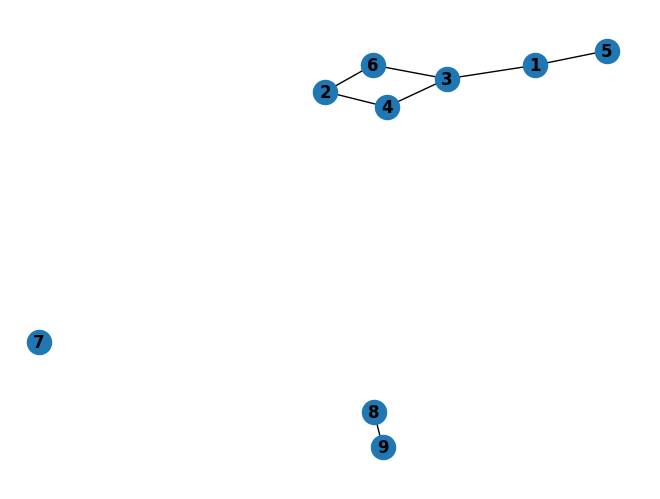

In [206]:
G.add_edge(8, 9)

print(G)
nx.draw(G, with_labels=True, font_weight='bold')

**Answer**: The corresponding nodes will be automatically added to the graph.

## Examine the elements of our graph

In [207]:
# Get lists of nodes and edges.
print("Nodes in our graph:", list(G.nodes))
print("Edges in our graph:", list(G.edges))

Nodes in our graph: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges in our graph: [(1, 3), (1, 5), (2, 4), (2, 6), (3, 4), (3, 6), (8, 9)]


**NOTE:** the class **Graph** handles undirected graphs. In fact edge `(1,3)` and `(3,1)` have the *same meaning*. If you want to work with directed graphs, use the class **DiGraph** (later).

In [208]:
# Check that (1,3) is equal to (3,1):
print("Does edge '(1,3)' belong to G? -->", (1,3) in G.edges)
print("Does edge '(3,1)' belong to G? -->", (3,1) in G.edges)

Does edge '(1,3)' belong to G? --> True
Does edge '(3,1)' belong to G? --> True


We can also see the **neighbors** of a node.

In [209]:
# All roads lead to Rome:
print(list(G[2]))
print(list(G.neighbors(2)))
print(list(G.adj[2]))

[4, 6]
[4, 6]
[4, 6]


**NOTE:** NetworkX generally returns *iterators*, *views* or *dictionaries* and **not lists**. You need to convert the output if you want to display it.

In [210]:
print("G[2]:\t\t", G[2])
print("G.adj[2]:\t", G.adj[2])
print("G.neighbors(2):\t", G.neighbors(2))

G[2]:		 {4: {}, 6: {}}
G.adj[2]:	 {4: {}, 6: {}}
G.neighbors(2):	 <dict_keyiterator object at 0x000001FC4C434680>


## Removing elements

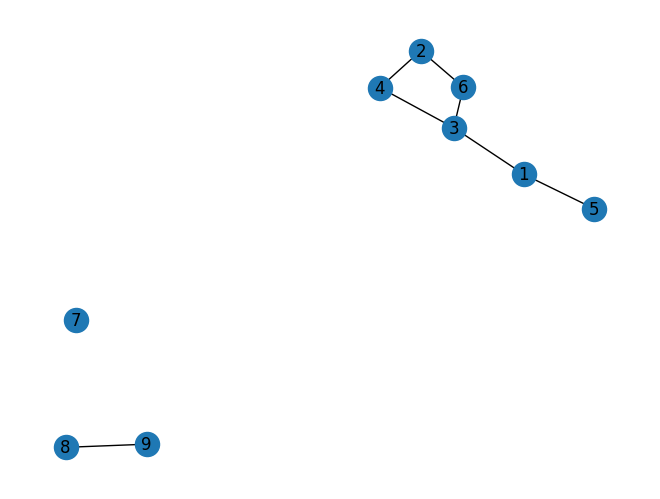

In [211]:
nx.draw(G, with_labels=True)

Now we remove a _disconnected_ node.

Graph named 'my_awesome_graph' with 8 nodes and 7 edges
[1, 2, 3, 4, 5, 6, 8, 9]
[(1, 3), (1, 5), (2, 4), (2, 6), (3, 4), (3, 6), (8, 9)]


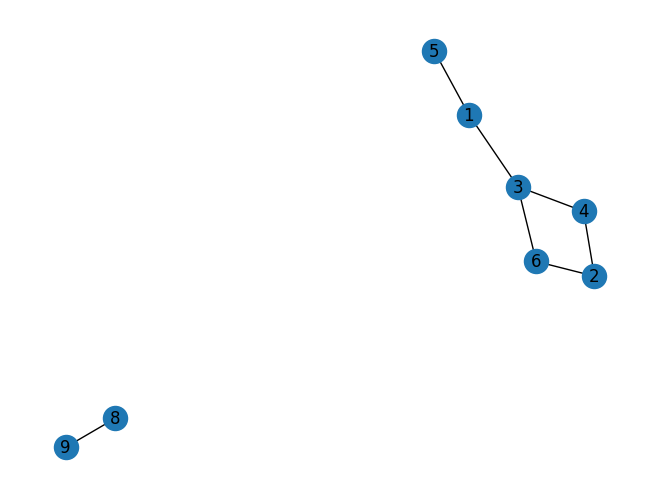

In [212]:
# Remove disconnected node.
G.remove_node(7)

print(G)
print(list(G.nodes))
print(list(G.edges))

nx.draw(G, with_labels=True)

**Q2:** What happens if we remove a node involved in an edge (connected node)?

Graph named 'my_awesome_graph' with 7 nodes and 4 edges
Nodes: [1, 2, 4, 5, 6, 8, 9]
Edges: [(1, 5), (2, 4), (2, 6), (8, 9)]


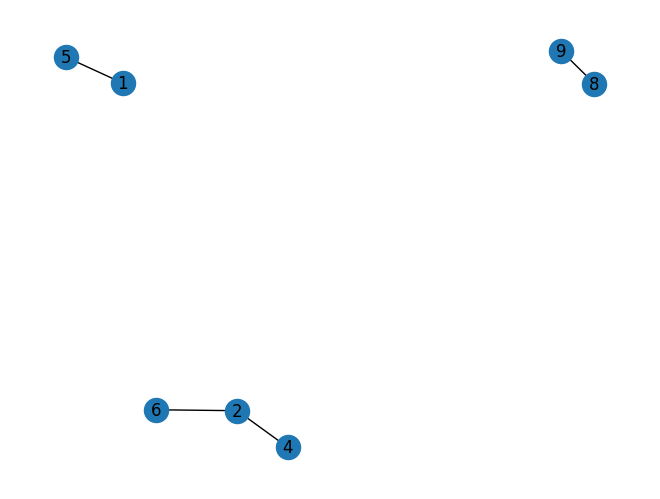

In [213]:
# Remove connected node.
G.remove_node(3)

print(G)
print("Nodes:", list(G.nodes))
print("Edges:", list(G.edges))

nx.draw(G, with_labels=True)

**Answer:** The corresponding edges are also removed.

**Q3**: What happens if we remove an edge?

Graph named 'my_awesome_graph' with 7 nodes and 3 edges
Nodes: [1, 2, 4, 5, 6, 8, 9]
Edges: [(1, 5), (2, 4), (2, 6)]


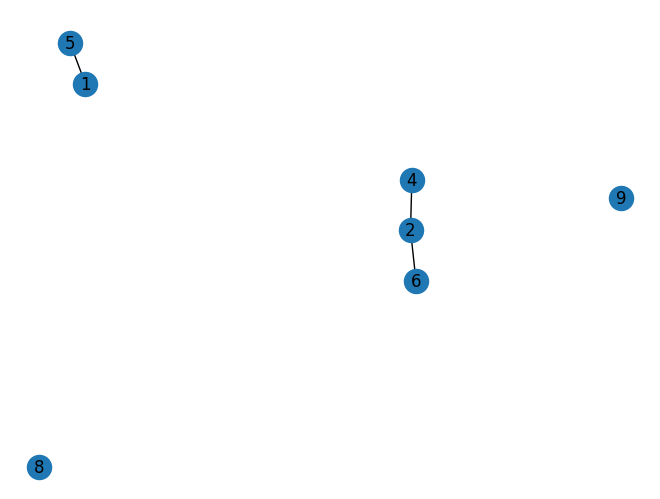

In [214]:
G.remove_edge(8,9)

print(G)
print("Nodes:", list(G.nodes))
print("Edges:", list(G.edges))

nx.draw(G, with_labels=True)

**Answer:** Only the edge is removed, but the involved nodes are kept.

## Node/Edge Attributes

Graph with 6 nodes and 7 edges
Nodes: [1, 2, 3, 4, 5, 6]
Edges: [(1, 2), (2, 3), (3, 4), (3, 5), (3, 6), (4, 5), (5, 6)]


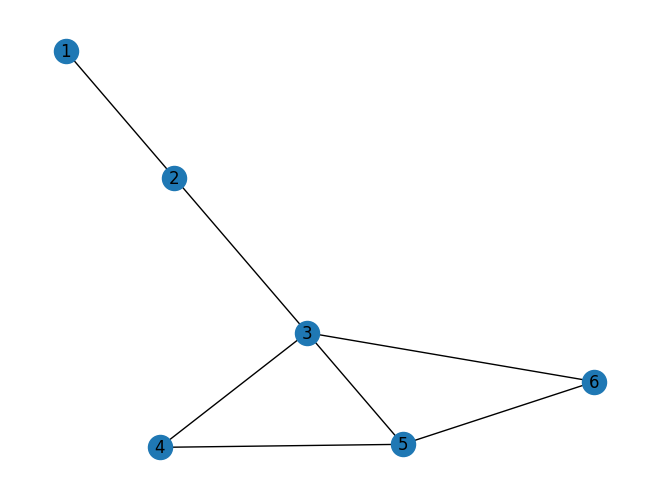

In [215]:
# Init a new graph for clarity.
G = nx.Graph()

edges_to_add = [(1,2), (2,3), (3,4), (3,5), (3,6), (4,5), (5,6)]
G.add_edges_from(edges_to_add)

print(G)
print("Nodes:", list(G.nodes))
print("Edges:", list(G.edges))

nx.draw(G, with_labels=True)

### Node attributes
Attributes are managed as *dictionaries of dictionaries*:

```
{node1: {attribute1: value1, ..., attributeN: valueN},
 node2: {attribute1: value1, ..., attributeN: valueN},
 :
 :
 nodeN: {attribute1: value1, ..., attributeN: valueN}}
```

Then we can set the attribute for one node at a time or for all nodes at once.

Assuming that our graph represents the relationship within a group of people, some typical attributes may be: *age*, *height*, *work*, *ecc*...

In [216]:
# Set node attribute one at a time.
G.nodes[1]["name"] = "Albert Einstein"
G.nodes[1]["work"] = "Physicist"
G.nodes[1]["age"] = 76
G.nodes[1]["height"] = 176

G.nodes[2]["name"] = "Marie Curie"
G.nodes[2]["work"] = "Physicist"
G.nodes[2]["city_of_birth"] = "Warsaw"

# Display node attributes.
print("Info node 1:", G.nodes[1])
print("Info node 2:", G.nodes[2])
print("Info node 3:", G.nodes[3])

Info node 1: {'name': 'Albert Einstein', 'work': 'Physicist', 'age': 76, 'height': 176}
Info node 2: {'name': 'Marie Curie', 'work': 'Physicist', 'city_of_birth': 'Warsaw'}
Info node 3: {}


As you can see, nodes can have **different attributes**.

But this process could easily become time consuming. Luckily we can also set multiple attributes at once (using the **dictionary of dictionaries notation**).

In [217]:
# Set multiple node attributes at once.
attributes = {1: {"name": "Albert Einstein", "work": "Physicist", "age": 76, "height": 176, "city_of_birth": "Ulm"},
              2: {"name": "Marie Curie", "work": "Physicist", "age": 66, "height": 155, "city_of_birth": "Warsaw"},
              3: {"name": "Alan Turing", "work": "Mathematician", "age": 41, "height": 180, "city_of_birth": "Maida Vale"}}

nx.set_node_attributes(G, attributes)

We can see the value of an attribute for all nodes, or we can see all the attributes of a single node.

In [218]:
# Same attribute, all nodes:
print("Same attribute for all nodes")
print("----------------------------")
print("Node names:\t",nx.get_node_attributes(G, "name"))
print("Node ages:\t", nx.get_node_attributes(G, "age"))
print("")

# One node, all attributes:
print("All attributes of one specific node")
print("-----------------------------------")
print("Node 3 attributes:", G.nodes[3])

Same attribute for all nodes
----------------------------
Node names:	 {1: 'Albert Einstein', 2: 'Marie Curie', 3: 'Alan Turing'}
Node ages:	 {1: 76, 2: 66, 3: 41}

All attributes of one specific node
-----------------------------------
Node 3 attributes: {'name': 'Alan Turing', 'work': 'Mathematician', 'age': 41, 'height': 180, 'city_of_birth': 'Maida Vale'}


### Edge attributes

The same thing also applies to edges.

In [219]:
# Set edge attributes.
edge_attributes = {(1,2): {"collaborated": True, "visited": True},
                   (2,3): {"collaborated": False, "visited": True}}

nx.set_edge_attributes(G, edge_attributes)
print("Info edge (1,2):", G.edges[(1,2)])
print("Info edge (2,3):", G.get_edge_data(2,3)) # Another way to access the same informations.

Info edge (1,2): {'collaborated': True, 'visited': True}
Info edge (2,3): {'collaborated': False, 'visited': True}


### Weighted edges

The weight of an edge is nothing more than an attribute. However, given its importance, it can be set automatically by specifying it as the third parameter in the tuple representing the edge.

In [220]:
# Add weighted edges (remember that if the nodes are not present in the graph
# they will be automatically added).
weighted_edges = [(1,2,0.5), (2,3,0.2), (5,7,0.8)]
G.add_weighted_edges_from(weighted_edges)

for node_i, node_j in G.edges:
    print(f"Edge {node_i, node_j}: {G.get_edge_data(node_i, node_j)}")

Edge (1, 2): {'collaborated': True, 'visited': True, 'weight': 0.5}
Edge (2, 3): {'collaborated': False, 'visited': True, 'weight': 0.2}
Edge (3, 4): {}
Edge (3, 5): {}
Edge (3, 6): {}
Edge (4, 5): {}
Edge (5, 6): {}
Edge (5, 7): {'weight': 0.8}


An additional attribute called *weight* is created automatically.

## Adjacency Matrix

adjacency-matrix.svg

We can also obtain the adjacency matrix of the graph.

**NOTE:**  NetworkX return a `compact notation` to save memory that saves nodes only if they are connected by an edge (showing the weight of the edge). The *default weight value* is 1.

In [221]:
# Get adjacency matrix in compact notation.
adj = nx.adjacency_matrix(G)
print(adj)

  (0, 1)	0.5
  (1, 0)	0.5
  (1, 2)	0.2
  (2, 1)	0.2
  (2, 3)	1.0
  (2, 4)	1.0
  (2, 5)	1.0
  (3, 2)	1.0
  (3, 4)	1.0
  (4, 2)	1.0
  (4, 3)	1.0
  (4, 5)	1.0
  (4, 6)	0.8
  (5, 2)	1.0
  (5, 4)	1.0
  (6, 4)	0.8


To display the full matrix we must first **convert it to dense**. This operation is **NOT SUITABLE** for **large graphs**!

What matters are the **indices** of the nodes and **not** the names.

In [222]:
# Display dense adjacency matrix.
print(adj.todense())

[[0.  0.5 0.  0.  0.  0.  0. ]
 [0.5 0.  0.2 0.  0.  0.  0. ]
 [0.  0.2 0.  1.  1.  1.  0. ]
 [0.  0.  1.  0.  1.  0.  0. ]
 [0.  0.  1.  1.  0.  1.  0.8]
 [0.  0.  1.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.8 0.  0. ]]


## Directed Graphs

So far we have dealt with undirected graphs. Let's now see how to manage `Directed Graphs` with NetworkX.

Simply NetworkX provides us with a specific class named  `DiGraph`.

DiGraph with 4 nodes and 5 edges


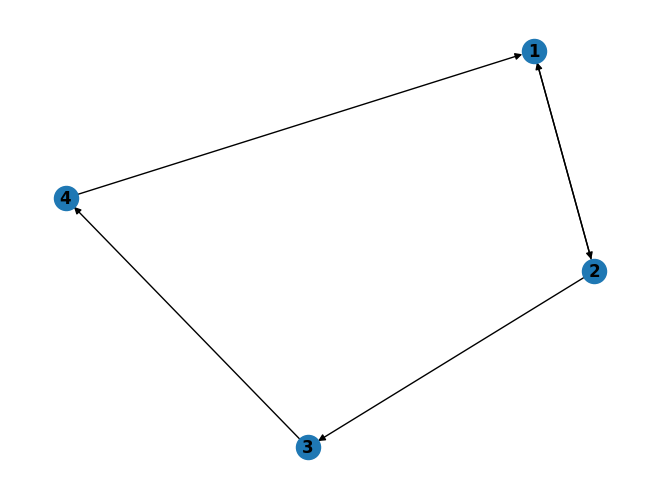

In [223]:
DG = nx.DiGraph()
edges_to_add = [(1,2),(2,3),(3,4),(2,1),(4,1)]
DG.add_edges_from(edges_to_add)
print(DG)

nx.draw(DG, with_labels=True, font_weight='bold')

Now, the **order** of the **nodes** within the tuple is important, as it defines the **direction of the edge**.

In [224]:
print("Does edge '(2,3)' belong to G? -->", (2,3) in DG.edges)
print("Does edge '(3,2)' belong to G? -->", (3,2) in DG.edges)

Does edge '(2,3)' belong to G? --> True
Does edge '(3,2)' belong to G? --> False


# Visualize Graphs

We have already seen examples of how to display a graph throughout the notebook.

In this section we simply provide some clarification by saying that NetworkX focuses primarily on graph analysis and not visualization. For this reason the functions that allow visualizations are minimal and are based on *matplotlib*. Then we can use the same visualization features.

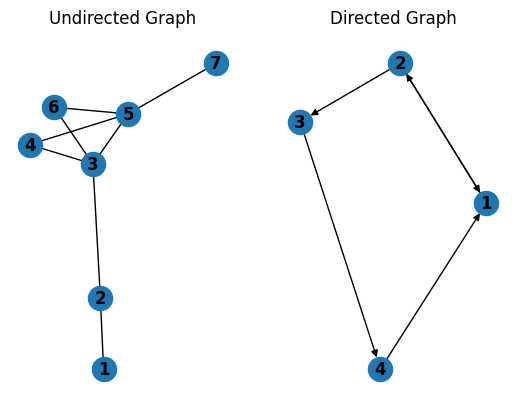

In [225]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)
nx.draw(G, with_labels=True, font_weight='bold', ax=axs[0])
axs[0].set_title('Undirected Graph')

nx.draw(DG, with_labels=True, font_weight='bold', ax=axs[1])
axs[1].set_title('Directed Graph')

plt.show()  # Optional in Colab.

# Generate graphs from known models

NetworkX exposes fucntions to generate graphs according to known models.

Below we provide two examples.

## Barabasi-Albert Preferential Attachment
The Barabási–Albert (BA) model is an algorithm for generating random scale-free networks using a preferential attachment mechanism. Several natural and human-made systems, including the Internet, the World Wide Web, citation networks, and some social networks are thought to be approximately scale-free and certainly contain few nodes (called hubs) with unusually high degree as compared to the other nodes of the network (source: [Wikipedia](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model))

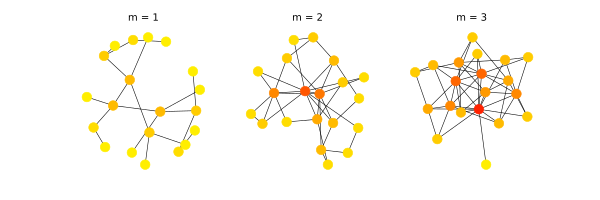

Graph with 20 nodes and 75 edges


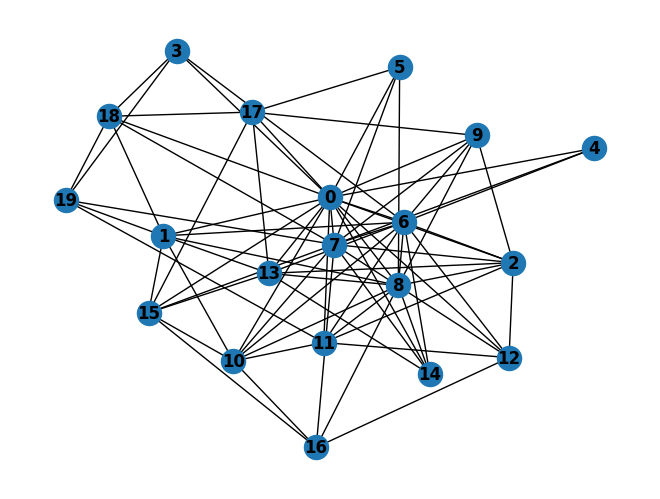

In [226]:
BA = nx.barabasi_albert_graph(20, 5)
print(BA)

nx.draw(BA, with_labels=True, font_weight='bold')

## Erdos-Renyi
The graph is constructed by connecting nodes randomly. Each edge is included in the graph with probability *p* independent from every other edge.

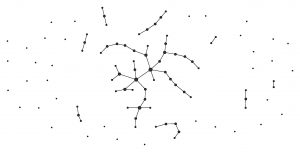

Graph with 20 nodes and 35 edges


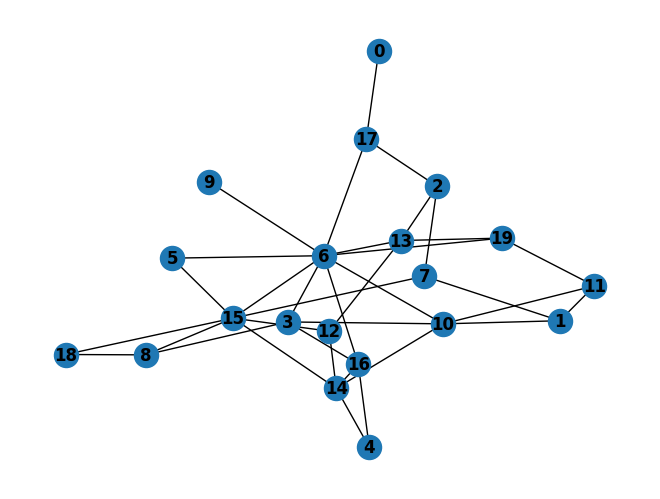

In [227]:
ER = nx.erdos_renyi_graph(20, 0.2)
print(ER)

nx.draw(ER, with_labels=True, font_weight='bold')

# Union, Intersection, Difference and Composition of Networks
Now that we know some NetworkX basics and how to visualize graphs, we can see how to perform operations on them.

We will show how to perform **union**, **intersection** and **difference** using the random graphs generated below.

## Union
Graphs must be **disjoint** (no nodes in common). If this is not the case we can use the argument `rename` to rename the nodes such that the graphs become disjoint. It is ok for the porpuses of this tutorial.

Graph with 40 nodes and 110 edges


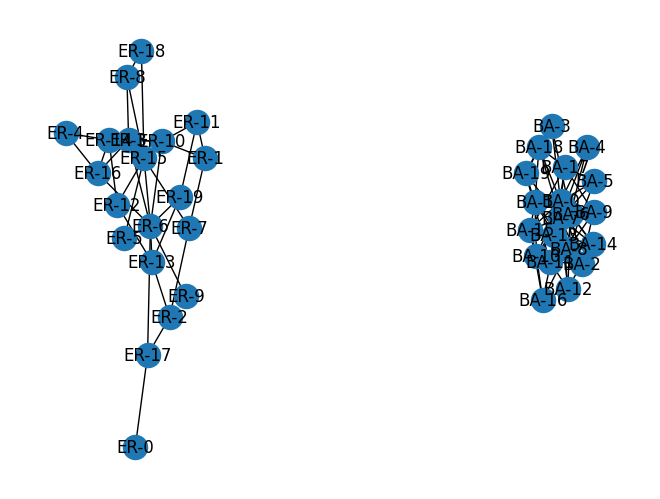

In [228]:
U = nx.union(BA, ER, rename=("BA-", "ER-"))

print(U)
nx.draw(U, with_labels=True, font_weight='normal')

## Intersection
It returs a graphs that contains only the nodes and the edges that **exist in both graphs**. It can be interesting to explore what two random generated graphs have in common.

Graph with 20 nodes and 11 edges
Edges: [(0, 17), (1, 10), (2, 7), (2, 13), (3, 6), (6, 13), (6, 10), (6, 9), (7, 15), (10, 11), (11, 19)]


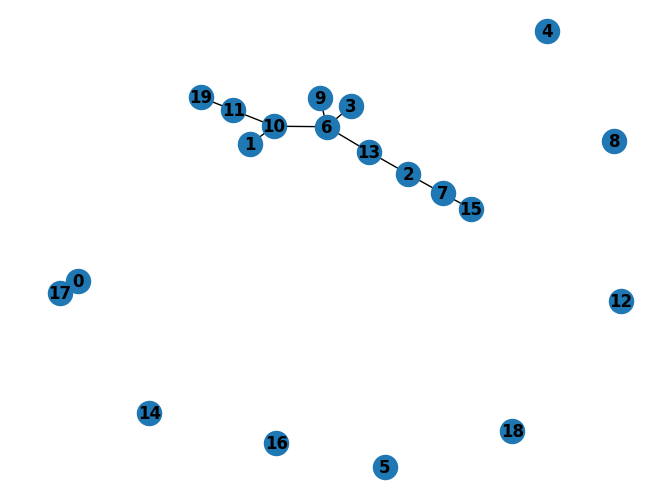

In [229]:
I = nx.intersection(BA, ER)

print(I)
print("Edges:", I.edges())
nx.draw(I, with_labels=True, font_weight='bold')

## Difference
Returns a new graph that contains the edges that exist in the first graph but not in the second.

Text(0.5, 1.0, 'ER - BA Graph')

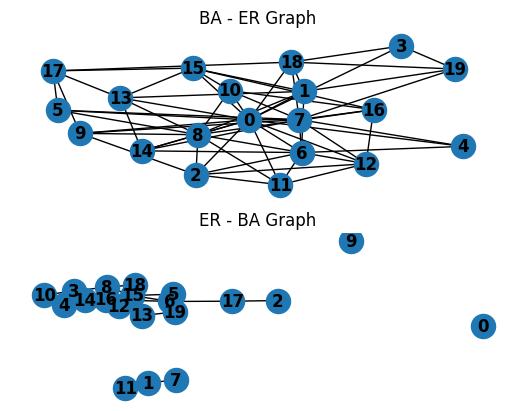

In [230]:
D1 = nx.difference(BA, ER)
D2 = nx.difference(ER, BA) # The opposite.


fig, axs = plt.subplots(2, 1)
nx.draw(D1, with_labels=True, font_weight='bold', ax=axs[0])
axs[0].set_title('BA - ER Graph')

nx.draw(D2, with_labels=True, font_weight='bold', ax=axs[1])
axs[1].set_title('ER - BA Graph')

## Composition
Ok but, what if I want to combine two graphs taking into consideration the *common nodes*?

The answer is: **graph composition**.

Graph with 20 nodes and 99 edges
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 17), (0, 18), (1, 6), (1, 8), (1, 10), (1, 13), (1, 15), (1, 18), (1, 19), (1, 7), (1, 11), (2, 6), (2, 7), (2, 8), (2, 9), (2, 11), (2, 12), (2, 13), (2, 17), (3, 6), (3, 18), (3, 19), (3, 8), (3, 10), (3, 16), (4, 6), (4, 7), (4, 14), (4, 16), (5, 7), (5, 8), (5, 17), (5, 6), (5, 15), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (6, 19), (7, 9), (7, 10), (7, 12), (7, 14), (7, 15), (7, 16), (7, 18), (7, 19), (8, 9), (8, 10), (8, 11), (8, 13), (8, 14), (8, 16), (8, 15), (8, 18), (9, 17), (10, 11), (10, 15), (10, 16), (10, 14), (11, 12), (11, 19), (12, 16), (12, 13), (12, 14), (12, 15), (13, 14), (13, 15), (13, 17), (13, 19), (14, 15), (14, 16), (15, 16), (15, 17), (15, 18), (17, 18), (18, 19)]


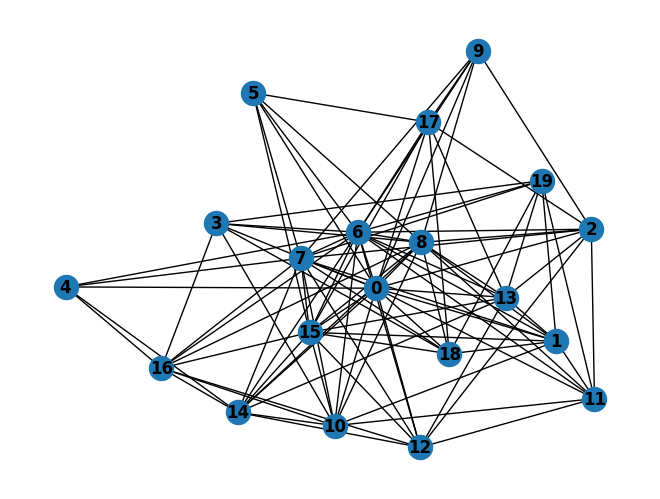

In [231]:
C = nx.compose(BA, ER)

print(C)
print("Edges:", C.edges())
nx.draw(C, with_labels=True, font_weight='bold')

Keep in mind that Composition **preserves** the **node attributes**.

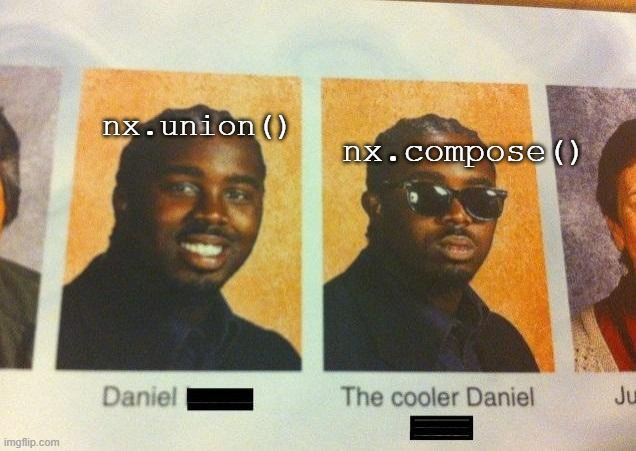

# Loading a Graph

Now we will make things more intereassing by learning how to create graphs from **existenit data**. For the rest of the lab, we will use a reduced version of a Biogriod network, which contains known protein-protein interactions. The network information is stored within a CSV file.

## Create the DataFrame

The first thing to do is to read the CSV file and convert it into a pandas `DataFrame`.

In [232]:
import pandas as pd

data_dir = r"\\wsl.localhost\Ubuntu\home\neusvegasm\gitrepo\networkMedicine\NetworkMedicine"
ppi_file = data_dir + r"\biogrid_redux.csv"

df = pd.read_csv(ppi_file, sep = ",", header=0)
df.head()   # If no value specified, dispaly only the first 5 rows.

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,Q59H94,NP_001120959|NP_001449,-,-,-,-,-,-,Homo sapiens,Homo sapiens
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,Q59FD9|F6THM6,NP_001094|NP_001265272|NP_001265273,-,-,-,-,-,-,Homo sapiens,Homo sapiens
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,-,NP_002018,-,-,-,-,-,-,Homo sapiens,Homo sapiens
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,-,NP_150250|NP_150253|NP_150252|NP_150247|NP_150...,-,-,-,-,-,-,Homo sapiens,Homo sapiens
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,-,NP_644805|NP_003141|NP_001356447|NP_001356443|...,-,-,-,-,-,-,Homo sapiens,Homo sapiens


## Build graph from DataFrame

Using the dataframe we have created, we can finally build our graph using NetworkX. We use the utility `nx.from_pandas_edgelist()` specifying the columns of the dataframe to use as **reference for graph nodes**. In addition, we can also specify the **type of graph** we want, whether direct or indirect.

In [233]:
# Build the graph from DataFrame.
bio = nx.from_pandas_edgelist(df,
                              source = "Official Symbol Interactor A",
                              target = "Official Symbol Interactor B",
                              create_using=nx.Graph())      # nx.Graph() doesn't allow duplicated edges
print(bio)
print("Graph nodes:", bio.nodes())
print("Graph edges:", bio.edges())

Graph with 1211 nodes and 979 edges
Graph nodes: ['MAP2K4', 'FLNC', 'MYPN', 'ACTN2', 'ACVR1', 'FNTA', 'GATA2', 'PML', 'RPA2', 'STAT3', 'ARF1', 'GGA3', 'ARF3', 'ARFIP2', 'ARFIP1', 'XRN1', 'ALDOA', 'APP', 'APPBP2', 'APLP1', 'DAB1', 'CITED2', 'TFAP2A', 'EP300', 'APOB', 'MTTP', 'ARRB2', 'RALGDS', 'CSF1R', 'GRB2', 'PRRC2A', 'LSM1', 'NARS', 'SLC4A1', 'SLC4A1AP', 'BCL3', 'BARD1', 'ADRB1', 'GIPC1', 'BRCA1', 'ATF1', 'MSH2', 'MSH6', 'ARVCF', 'CDH15', 'PCBD1', 'CACNA1C', 'PSEN2', 'CAPN1', 'CAPN3', 'TTN', 'ITPR1', 'CA8', 'MAGI1', 'CTNNB1', 'RB1', 'CUX1', 'TSG101', 'CDKN1A', 'ORC1', 'MCM2', 'ORC4', 'MCM5', 'CDC7', 'ORC2', 'DBF4', 'AKAP8', 'RPA1', 'RPA3', 'ORC5', 'MCM3', 'YWHAZ', 'CDC25A', 'DOCK8', 'CDC42', 'TRIP10', 'CDKN3', 'CDK2', 'RBBP8', 'RBL1', 'HAND2', 'CENPB', 'CLTC', 'HGS', 'IGFBP3', 'COL1A1', 'TXN', 'ATF2', 'SMAD3', 'SMAD4', 'CCND3', 'EIF3K', 'RALBP1', 'CCNB1', 'PPIB', 'CAMLG', 'CSRP1', 'CSK', 'INSR', 'IGF1R', 'DCN', 'EGFR', 'SIM2', 'ARNT', 'SIM1', 'NPAS4', 'HBEGF', 'ZBTB16', 'PCNA', 'GADD

In this case we have no edge weight/attributes, but in case they can be added using the additional parameter `edge_attr` of the method.

## Operation on graph
Now we will present some common operations that can be performed on graphs.

### Get the number of nodes/edges

In [234]:
# Number of nodes.
bio.number_of_nodes()

1211

In [235]:
# Number of edges.
bio.number_of_edges()

979

### Get connected components
The connected components are th subgraphs such that there exist a path that connects a node to all the others.

In [236]:
# Get the connected components.
conn_comp = list(nx.connected_components(bio))  # List of sets.
print("Number of connected components:", len(conn_comp))
print(conn_comp)

Number of connected components: 317
[{'FLNC', 'MAP2K4'}, {'ACTN2', 'NEB', 'MYPN', 'ACTN3', 'NEBL', 'ANKRD23'}, {'TGFB1', 'ACVR1', 'FNTA'}, {'PML', 'GATA2'}, {'Lmo2', 'Rab13', 'Rab3b', 'KCTD3', 'ETS1', 'ORC6', 'FHL2', 'ORC1', 'SYP', 'Rnf138', 'MCM5', 'MYH13', 'THEG', 'TTF2', 'Nuak2', 'Ocln', 'CLPB', 'RB1', 'ATF2', 'Arfrp1', 'Ppp2r2d', 'ARHGAP18', 'Map2k3', 'Arhgef1', 'SLC2A4', 'SKIV2L2', 'Smad3', 'CDC45', 'ITCH', 'SNX9', 'CUX1', 'DAXX', 'Rhebl1', 'THUMPD3', 'Rgs3', 'MPP6', 'VPS11', 'DRAP1', 'PDCD6IP', 'Arhgef11', 'Rras2', 'LSM7', 'EXOSC6', 'PINX1', 'SNRPD2', 'SMAD4', 'Wee1', 'LSM1', 'EXOSC7', 'Smad2', 'FNBP1', 'EXOSC10', 'Arhgef7', 'Ilkap', 'ZEB1', 'TNKS', 'Smad1', 'Rab2b', 'AKAP9', 'TALDO1', 'LSM5', 'ORC5', 'N4BP1', 'LSM2', 'SFPQ', 'AATF', 'Nek6', 'XRN1', 'GTF2I', 'Pbk', 'UPF2', 'UPF3B', 'RAB29', 'Stat1', 'IL1RAP', 'LSM6', 'EIF4A1', 'Rhobtb1', 'BAG6', 'THOC1', 'ADAM15', 'Rhod', 'SMAD2', 'THOP1', 'TACC3', 'Sqstm1', 'Irak2', 'AP1G2', 'TNIP1', 'TOLLIP', 'MCM4', 'NARS', 'EXOSC8', 'CHD4', '

In [237]:
# Sort the connected components by descending order.
sorted_conn_comp = sorted(conn_comp, key=len, reverse=True)

# Display the lenghts of connected components.
conn_comp_lens = [len(c) for c in sorted_conn_comp]
print("Connected component lengths:", conn_comp_lens)

Connected component lengths: [185, 50, 39, 37, 22, 16, 15, 13, 13, 12, 9, 8, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Isolate the LCC (Largest Connected Component)

The LCC is the subgraph containing the nodes of the largest connected component (and the edges involved).

In [238]:
LCC = max(conn_comp, key=len)
print('LCC:', LCC)                 # LCC is a set of nodes.
print("LCC length:", len(LCC))

LCC: {'Lmo2', 'Rab13', 'Rab3b', 'KCTD3', 'ETS1', 'ORC6', 'FHL2', 'ORC1', 'SYP', 'Rnf138', 'MCM5', 'MYH13', 'THEG', 'TTF2', 'Nuak2', 'Ocln', 'CLPB', 'RB1', 'ATF2', 'Arfrp1', 'Ppp2r2d', 'ARHGAP18', 'Map2k3', 'Arhgef1', 'SLC2A4', 'SKIV2L2', 'Smad3', 'CDC45', 'ITCH', 'SNX9', 'CUX1', 'DAXX', 'Rhebl1', 'THUMPD3', 'Rgs3', 'MPP6', 'VPS11', 'DRAP1', 'PDCD6IP', 'Arhgef11', 'Rras2', 'LSM7', 'EXOSC6', 'PINX1', 'SNRPD2', 'SMAD4', 'Wee1', 'LSM1', 'EXOSC7', 'Smad2', 'FNBP1', 'EXOSC10', 'Arhgef7', 'Ilkap', 'ZEB1', 'TNKS', 'Smad1', 'Rab2b', 'AKAP9', 'TALDO1', 'LSM5', 'ORC5', 'N4BP1', 'LSM2', 'SFPQ', 'AATF', 'Nek6', 'XRN1', 'GTF2I', 'Pbk', 'UPF2', 'UPF3B', 'RAB29', 'Stat1', 'IL1RAP', 'LSM6', 'EIF4A1', 'Rhobtb1', 'BAG6', 'THOC1', 'ADAM15', 'Rhod', 'SMAD2', 'THOP1', 'TACC3', 'Sqstm1', 'Irak2', 'AP1G2', 'TNIP1', 'TOLLIP', 'MCM4', 'NARS', 'EXOSC8', 'CHD4', 'AP1B1', 'NONO', 'Wwp2', 'AP1S1', 'Stk35', 'TTC19', 'RPA1', 'Rnf14', 'HBP1', 'Rac2', 'EXOSC5', 'ORC3', 'MCM3', 'MCRS1', 'SNRPE', 'EXOSC1', 'MCM7', 'RBL2'

**Be careful**, the returned LCC is **not a graph**, but a set of nodes. If we need a graph, we must create the **induced subgraph** that contains the nodes in the LCC and the edges between them.

Graph with 185 nodes and 233 edges


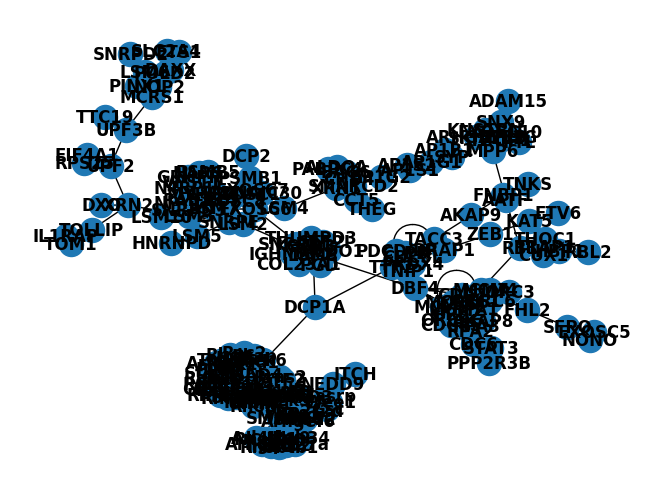

In [239]:
LCC_bio = nx.subgraph(bio, LCC).copy() # .copy() is foundamental if we need to modify the subgraph. Otherwise it will generate a *frozen* view of the graph.

print(LCC_bio)
nx.draw(LCC_bio, with_labels=True, font_weight='bold')

Visualization in NetworkX is a nightmare.

### Remove self loops
Even though biologically relevant, removing self-loops can be useful for several reasons (e.g when computing shortest paths).

In [240]:
# Get list of self loop edges.
self_loop_edges = list(nx.selfloop_edges(LCC_bio))
print("Number of self loops: ", len(self_loop_edges))

# Remove those self loops.
LCC_bio.remove_edges_from(self_loop_edges)
print(LCC_bio)

Number of self loops:  2
Graph with 185 nodes and 231 edges


In [241]:
LCC_bio.nodes()

NodeView(('Lmo2', 'Rab13', 'Rab3b', 'KCTD3', 'ETS1', 'ORC6', 'FHL2', 'ORC1', 'SYP', 'Rnf138', 'MCM5', 'MYH13', 'THEG', 'TTF2', 'Nuak2', 'Ocln', 'CLPB', 'RB1', 'ATF2', 'Arfrp1', 'Ppp2r2d', 'ARHGAP18', 'Map2k3', 'Arhgef1', 'SLC2A4', 'SKIV2L2', 'Smad3', 'CDC45', 'ITCH', 'SNX9', 'CUX1', 'DAXX', 'Rhebl1', 'THUMPD3', 'Rgs3', 'MPP6', 'VPS11', 'DRAP1', 'PDCD6IP', 'Arhgef11', 'Rras2', 'LSM7', 'PINX1', 'SNRPD2', 'EXOSC6', 'SMAD4', 'Wee1', 'LSM1', 'EXOSC7', 'Smad2', 'FNBP1', 'EXOSC10', 'Arhgef7', 'Ilkap', 'ZEB1', 'TNKS', 'Smad1', 'Rab2b', 'AKAP9', 'TALDO1', 'LSM5', 'ORC5', 'N4BP1', 'LSM2', 'SFPQ', 'AATF', 'Nek6', 'XRN1', 'GTF2I', 'Pbk', 'UPF2', 'UPF3B', 'RAB29', 'Stat1', 'IL1RAP', 'LSM6', 'EIF4A1', 'Rhobtb1', 'BAG6', 'THOC1', 'ADAM15', 'Rhod', 'SMAD2', 'THOP1', 'TACC3', 'Sqstm1', 'Irak2', 'AP1G2', 'TNIP1', 'TOLLIP', 'MCM4', 'NARS', 'EXOSC8', 'CHD4', 'AP1B1', 'NONO', 'Wwp2', 'AP1S1', 'Stk35', 'TTC19', 'RPA1', 'Rnf14', 'HBP1', 'Rac2', 'EXOSC5', 'ORC3', 'MCM3', 'MCRS1', 'SNRPE', 'EXOSC1', 'MCM7', 'R

### Compute the path between nodes
We can both check if the path exist and compute the shortest path. We are working with a connected component, so we expect the path to exist.

In [242]:
# Check if the path exists.
nx.has_path(LCC_bio, "CDC7", "LSM4")

True

In [243]:
# Compute the shortest path.
path = nx.shortest_path(LCC_bio, "CDC7", "LSM4")
print("Shortest path: ", path)

Shortest path:  ['CDC7', 'DBF4', 'LSM8', 'LSM2', 'LSM3', 'SNRPE', 'LSM4']


### Create and visualize subgraphs
We can create a subgraph from a list of nodes. NetworkX doesn't genereate a new graph but produces a **frozen view** on the original graph.

If we need to modify the subgraph, we have to store it memory using `subgraph.copy()`

In [244]:
# Get the list of subgraph nodes (using a node and its first neighbors).
nodes_to_viz = ["CDC7"] + list(LCC_bio.adj["CDC7"])
nodes_to_viz

['CDC7', 'ORC6', 'ORC1', 'MCM5', 'MCM4', 'MCM7', 'MCM2', 'DBF4']

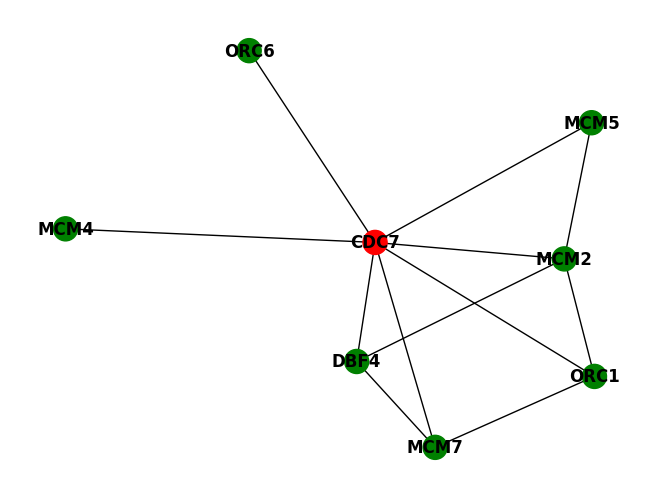

In [245]:
# Create and visualize the subgraph.
sub_bio = LCC_bio.subgraph(nodes_to_viz)

color_map = ['red' if node == "CDC7" else 'green' for node in sub_bio]
nx.draw(sub_bio, with_labels=True, node_color = color_map, font_weight='bold')

If we try to remove a node from a *view* we run into an error.

In [246]:
# This code produces an error.
sub_bio.remove_node('ORC6')

NetworkXError: Frozen graph can't be modified

In [247]:
# This not.
sub_bio_in_memory = sub_bio.copy()
sub_bio_in_memory.remove_node('ORC6')
print("Nodes:", sub_bio_in_memory.nodes())

Nodes: ['MCM5', 'MCM2', 'MCM7', 'CDC7', 'DBF4', 'ORC1', 'MCM4']


# Graph measures
We now explore some global and local graph measures. Global measures are referred to properties related to the whole graph, while local measures are centrality measures computed for single nodes (or edges). Those measures are extremely useful when looking for important/central nodes in a graph. There are many centrality measures, each one with a different biological interpretation.

## Local measures

We will compute several centrality measures of the nodes and we keep track of them in order to export/save them to a CSV file. Such measures indicate the importance/relevance of the nodes in the graph and can thus be used for further analysis or to create feature vectors for machine learning tasks.

In [248]:
import itertools
import pprint

def print_dict(string, dictionary, n=5):
    """
    Utility function to display only the first n elements
    of a dictionary.
    """

    dictionary = dict(dictionary)

    out = dict(itertools.islice(dictionary.items(), n))
    print(string)
    print("-" * len(string))
    pprint.pprint(out)
    print("")


# Init dictionary where to store local measures.
# When popuplated it will be a dictionary of dictionaries.
nodes = LCC_bio.nodes()
gene_measures = dict(nodes)
print_dict("Gene measures dictionary:", gene_measures)

Gene measures dictionary:
-------------------------
{'ETS1': {}, 'KCTD3': {}, 'Lmo2': {}, 'Rab13': {}, 'Rab3b': {}}



### Degree
The node degree is the number of edges adjacent to a node. We can compute it using:



In [249]:
# Compute the degree for one node.
G.degree(3)

4

In [250]:
# Compute all node degrees.
degrees = LCC_bio.degree()

print_dict("Degrees:", degrees, n=5) # Dispaly only first 5 elements.

Degrees:
--------
{'ETS1': 1, 'KCTD3': 1, 'Lmo2': 1, 'Rab13': 1, 'Rab3b': 1}



In [251]:
# Save the computed measure as node attribute.
for gene in gene_measures:
    gene_measures[gene]["Degree"] = degrees[gene]

print_dict("Gene measures:", gene_measures)

Gene measures:
--------------
{'ETS1': {'Degree': 1},
 'KCTD3': {'Degree': 1},
 'Lmo2': {'Degree': 1},
 'Rab13': {'Degree': 1},
 'Rab3b': {'Degree': 1}}



### Clustering coefficient

This measures the extent to which nodes tend to cluster together in the graph.
For unweighted graphs, the clustering of a node is the fraction of possible triangles through that node that exist:

\begin{align}
c_u = \frac{2 T(u)}{deg(u)(deg(u)-1)},
\end{align}

where `T(u)` is the number of triangles through node `u` and `deg(u)` is the degree of node `u`.

> **EXERCISE**
>
> Compute the clustering coefficient for node `u`.
> Use the method `nx.triangles()`. See the [Documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.triangles.html).

In [252]:
# @title 👩‍💻 Exercise
u = "CDC7"


clustering = 2*nx.triangles(bio, u) / (degrees(u)*(degrees(u)-1))

print(f"Clustering coefficinet of node {u}: {clustering}")

Clustering coefficinet of node CDC7: 0.23809523809523808


In [253]:
# @title ⚡ Built-in function

clustering = nx.clustering(LCC_bio) # dict like
print_dict("Clustering coefficient", clustering)

# Save the computed measure as node attribute.
for gene in gene_measures:
    gene_measures[gene]["Clustering"] = clustering[gene]

print_dict("Gene measures:", gene_measures)

print(f"Clustering coefficinet of node {u}: {clustering[u]}")

Clustering coefficient
----------------------
{'ETS1': 0, 'KCTD3': 0, 'Lmo2': 0, 'Rab13': 0, 'Rab3b': 0}

Gene measures:
--------------
{'ETS1': {'Clustering': 0, 'Degree': 1},
 'KCTD3': {'Clustering': 0, 'Degree': 1},
 'Lmo2': {'Clustering': 0, 'Degree': 1},
 'Rab13': {'Clustering': 0, 'Degree': 1},
 'Rab3b': {'Clustering': 0, 'Degree': 1}}

Clustering coefficinet of node CDC7: 0.23809523809523808


### Betweenness Centrality
It states the amount of influence a node has over the flow of information in a graph. A node with high betweenness centrality serves as a bridge from one part of a graph to another.

Betweenness centrality of a node is the sum of the fraction of all-pairs shortest paths that pass through $v$.

\begin{align}
    c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}
\end{align}

where $V$ is the set of nodes, $\sigma(s, t)$ is the number of shortest $(s, t)$-paths, and $\sigma(s, t|v)$ is the number of those paths passing through some node $v$ other than $s, t$.

If $s = t$, then $\sigma(s, t) = 1$
If $v \in s, t$, then $\sigma(s, t|v) = 0$

source: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html


> **EXERCISE**
>
> Compute the betweenneess centrality for the node `v`.
> Use `all_shortest_paths(G, source=None, target=None)` function from the NetworkX library. See the [Documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.all_shortest_paths.html).
>
> Remember that:
>
> 1. If s == t, then $\sigma(s, t) = 1$
> 2. If v == s or v == t, then $\sigma(s, t|v) = 0$
> 3. If v appears as an **endpoint** in the shortest path, do not consider this path for the computation (in fact, we are interested only in the paths that pass **through** $v$.
> 4. The computed value is rescaled by $\frac{1}{(n-1)(n-2)}$ (already implemented).

In [254]:
# @title 👩‍💻 Exercise

v = "CDC7"
bet = 0

# Your solution here...
for s in list(LCC_bio.nodes):
    for t in list(LCC_bio.nodes):
        if t == s:
            continue  # Skip if both nodes are the same

        # If either node is 'v', set num to 0
        if s == v or t == v:
            num = 0
            den = 1  # Avoid division by zero
        else:
            # Get all shortest paths from s to t
            paths = list(nx.all_shortest_paths(LCC_bio, s, t))
            den = len(paths)  # Number of shortest paths

            if den == 0:  # No paths found
                continue  # Skip to the next pair if no paths exist

            # Count occurrences of 'v' in all paths
            num = sum(1 for path in paths for element in path if v in element)

        # Update bet only if num is non-zero
        if num != 0:
            bet += num / den  # Add contribution to bet
        



# Rescale the value
n = LCC_bio.number_of_nodes()
scale = 1 / ((n-1)*(n-2))
bet *= scale

print(f"Betweennees of node {v}: {bet}")

Betweennees of node CDC7: 0.029631444523639795


In [255]:
# @title ⚡ Built-in function

# Compute betweenness.
bet = nx.betweenness_centrality(LCC_bio)
print_dict("Betweenness:", bet)

# Save the measure as node attribute.
for gene in gene_measures:
    gene_measures[gene]["Betwenness"] = bet[gene]

print_dict("Gene measures:", gene_measures)


print(f"Betweennees of node {v}: {bet[v]}")

Betweenness:
------------
{'ETS1': 0.0, 'KCTD3': 0.0, 'Lmo2': 0.0, 'Rab13': 0.0, 'Rab3b': 0.0}

Gene measures:
--------------
{'ETS1': {'Betwenness': 0.0, 'Clustering': 0, 'Degree': 1},
 'KCTD3': {'Betwenness': 0.0, 'Clustering': 0, 'Degree': 1},
 'Lmo2': {'Betwenness': 0.0, 'Clustering': 0, 'Degree': 1},
 'Rab13': {'Betwenness': 0.0, 'Clustering': 0, 'Degree': 1},
 'Rab3b': {'Betwenness': 0.0, 'Clustering': 0, 'Degree': 1}}

Betweennees of node CDC7: 0.02963144452363976


### Closeness centrality
It is computed as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. The higher this centrality the closer the node is to all other nodes.

Mathematically it is defined as:
\begin{align}
C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)},
\end{align}

where `d(v, u)` is the shortest-path distance between `v` and `u`, and `n-1` is the number of nodes reachable from `u`.

Source: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html

> **EXERCISE**
>
> Compute the closeness centrality for the node `u`.
>
> Use the following functions from the NetworkX library:
>
> 1. `shortest_path(G, source=None, target=None)` to compute one of the shortest paths from `u` to `v` ([Documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html)).
> 2. `single_source_shortest_path_length(G, source, cutoff=None)` that computes the shortest paths lenghts from from source `u` to all reachable nodes ([Documentaion](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.unweighted.single_source_shortest_path_length.html)).
>
> References:
>
> 1. https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.unweighted.single_source_shortest_path_length.html
> 2. https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html
>
> If the graph is composed of multiple connected components the output should be normalized using:
> \begin{align}
> \frac{(n-1)}{|G|-1}
> \end{align}
> where `n` is the number of nodes in the connected part of graph containing the node (i.e. number of reachable nodes).


In [256]:
# @title 👩‍💻 Exercise

u = "CDC7"
close = 0

# Your solution here...

paths_lens = nx.single_source_shortest_path_length(LCC_bio,u)

num = sum(1 for element in paths_lens.values() if element > 0) - 1
den = sum(element for element in paths_lens.values())

close = num/den



print(f"Closeness centrality of node {u}: {close}")

Closeness centrality of node CDC7: 0.18865979381443299


In [257]:
# @title ⚡ Built-in function

close = nx.closeness_centrality(LCC_bio)
print_dict("Closensess centrality:", close)

for gene in gene_measures:
    gene_measures[gene]["Closeness"] = close[gene]

print_dict("Gene measures:", gene_measures)

print(f"Closeness centrality of node {u}: {close[u]}")

Closensess centrality:
----------------------
{'ETS1': 0.09699525566684239,
 'KCTD3': 0.2026431718061674,
 'Lmo2': 0.14465408805031446,
 'Rab13': 0.18326693227091634,
 'Rab3b': 0.18326693227091634}

Gene measures:
--------------
{'ETS1': {'Betwenness': 0.0,
          'Closeness': 0.09699525566684239,
          'Clustering': 0,
          'Degree': 1},
 'KCTD3': {'Betwenness': 0.0,
           'Closeness': 0.2026431718061674,
           'Clustering': 0,
           'Degree': 1},
 'Lmo2': {'Betwenness': 0.0,
          'Closeness': 0.14465408805031446,
          'Clustering': 0,
          'Degree': 1},
 'Rab13': {'Betwenness': 0.0,
           'Closeness': 0.18326693227091634,
           'Clustering': 0,
           'Degree': 1},
 'Rab3b': {'Betwenness': 0.0,
           'Closeness': 0.18326693227091634,
           'Clustering': 0,
           'Degree': 1}}

Closeness centrality of node CDC7: 0.18969072164948453


### Eigenvector centrality:
This centrality measures the *prestige* of a node. A high values means that a node is connected to many nodes which have a high score themself. It relies on concept that a connections to high-scoring nodes give more *prestige* than the same number of connections to low-scoring nodes. It is similar to **PageRank**.

In [258]:
eigen = nx.eigenvector_centrality(LCC_bio)
print_dict("Eigenvector centrality:", eigen)

for gene in gene_measures:
    gene_measures[gene]["Eigen"] = bet[gene]
print_dict("Gene measures:", gene_measures)

Eigenvector centrality:
-----------------------
{'ETS1': 4.65088565476917e-09,
 'KCTD3': 0.0018794360517526514,
 'Lmo2': 0.05382570408309902,
 'Rab13': 0.07136705301828261,
 'Rab3b': 0.07136705301828261}

Gene measures:
--------------
{'ETS1': {'Betwenness': 0.0,
          'Closeness': 0.09699525566684239,
          'Clustering': 0,
          'Degree': 1,
          'Eigen': 0.0},
 'KCTD3': {'Betwenness': 0.0,
           'Closeness': 0.2026431718061674,
           'Clustering': 0,
           'Degree': 1,
           'Eigen': 0.0},
 'Lmo2': {'Betwenness': 0.0,
          'Closeness': 0.14465408805031446,
          'Clustering': 0,
          'Degree': 1,
          'Eigen': 0.0},
 'Rab13': {'Betwenness': 0.0,
           'Closeness': 0.18326693227091634,
           'Clustering': 0,
           'Degree': 1,
           'Eigen': 0.0},
 'Rab3b': {'Betwenness': 0.0,
           'Closeness': 0.18326693227091634,
           'Clustering': 0,
           'Degree': 1,
           'Eigen': 0.0}}



### Visualize and export measures

We can visualize the measures using a Pandas `DataFrame`.

In [259]:
import pandas as pd

# Create a new Pandas DataFrame from the `gene_measures` dictionary.
centralDF = pd.DataFrame.from_dict(gene_measures, orient = "index")
centralDF.head()

,Degree,Clustering,Betwenness,Closeness,Eigen
Lmo2,1,0.0,0.0,0.144654,0.0
Rab13,1,0.0,0.0,0.183267,0.0
Rab3b,1,0.0,0.0,0.183267,0.0
KCTD3,1,0.0,0.0,0.202643,0.0
ETS1,1,0.0,0.0,0.096995,0.0


The index coloum of our DataFrame doesn't have a name. Let's define a custom name for it.

In [260]:
# Set index column name.
centralDF.index.name = "Gene"
centralDF.head()

,Degree,Clustering,Betwenness,Closeness,Eigen
Gene,,,,,
Lmo2,1,0.0,0.0,0.144654,0.0
Rab13,1,0.0,0.0,0.183267,0.0
Rab3b,1,0.0,0.0,0.183267,0.0
KCTD3,1,0.0,0.0,0.202643,0.0
ETS1,1,0.0,0.0,0.096995,0.0


Finally we can export the computed centrality measures as a CSV file.

In [276]:
# Export DataFrame.
centralDF.to_csv("centrality_measures.csv")

## Global measures

### Average Shortest Path
Compute all the shortest path from one node to the other and average.

In [262]:
avg = nx.average_shortest_path_length(LCC_bio)
print("Avg shortest path length: ", avg)

Avg shortest path length:  6.627732079905993


### Average degree
Average number of connected edges for any node. This is the most general centrality measure.

In [263]:
# Compute the degree for each node.
degree = LCC_bio.degree()

# Compute the average.
avg_degree = sum(dict(degree).values())/LCC_bio.number_of_nodes()
print("Avg degree: ", avg_degree)

Avg degree:  2.497297297297297


### Average clustering coefficient

This measures the extent to which nodes tend to cluster together in the graph. It is computed as:

\begin{align}
c_u = \frac{2 T(u)}{deg(u)(deg(u)-1)},
\end{align}

where T(u) is the number of triangles through node u and deg(u) is the degree of node u.

In [264]:
avg_cluster = nx.average_clustering(LCC_bio)
print("Avg clustering coeff: ", avg_cluster)

Avg clustering coeff:  0.038845598845598836


### Eccentricity
Maximum distance between a vertex to all other vertices.

In [265]:
ecc = nx.eccentricity(LCC_bio)
print("eccentricity: ", ecc)

eccentricity:  {'Lmo2': 14, 'Rab13': 12, 'Rab3b': 12, 'KCTD3': 10, 'ETS1': 15, 'ORC6': 12, 'FHL2': 12, 'ORC1': 12, 'SYP': 16, 'Rnf138': 12, 'MCM5': 12, 'MYH13': 10, 'THEG': 14, 'TTF2': 11, 'Nuak2': 12, 'Ocln': 12, 'CLPB': 12, 'RB1': 12, 'ATF2': 12, 'Arfrp1': 12, 'Ppp2r2d': 14, 'ARHGAP18': 15, 'Map2k3': 12, 'Arhgef1': 14, 'SLC2A4': 15, 'SKIV2L2': 15, 'Smad3': 12, 'CDC45': 12, 'ITCH': 15, 'SNX9': 15, 'CUX1': 13, 'DAXX': 14, 'Rhebl1': 14, 'THUMPD3': 10, 'Rgs3': 14, 'MPP6': 14, 'VPS11': 10, 'DRAP1': 12, 'PDCD6IP': 12, 'Arhgef11': 12, 'Rras2': 12, 'LSM7': 9, 'PINX1': 14, 'SNRPD2': 15, 'EXOSC6': 9, 'SMAD4': 11, 'Wee1': 14, 'LSM1': 9, 'EXOSC7': 10, 'Smad2': 14, 'FNBP1': 14, 'EXOSC10': 15, 'Arhgef7': 12, 'Ilkap': 12, 'ZEB1': 13, 'TNKS': 15, 'Smad1': 12, 'Rab2b': 12, 'AKAP9': 13, 'TALDO1': 10, 'LSM5': 11, 'ORC5': 12, 'N4BP1': 10, 'LSM2': 8, 'SFPQ': 13, 'AATF': 13, 'Nek6': 12, 'XRN1': 12, 'GTF2I': 10, 'Pbk': 12, 'UPF2': 11, 'UPF3B': 12, 'RAB29': 10, 'Stat1': 12, 'IL1RAP': 12, 'LSM6': 14, 'EIF4A1

### Radius (minimum eccentricity)
The radius is the minimum eccentricity considering all the nodes in the graph.

In [266]:
radius = nx.radius(LCC_bio)
print("radius: ", radius)

radius:  8


### Diameter (maximum eccentricity)
The radius is the minimum eccentricity considering all the nodes in the graph.

In [267]:
diameter = nx.diameter(LCC_bio)
print("diameter: ", diameter)

diameter:  16


### Center
The center is the set of nodes with minumun eccentricity (i.e. eccentricity equal to the radius).

center:  ['LSM2']


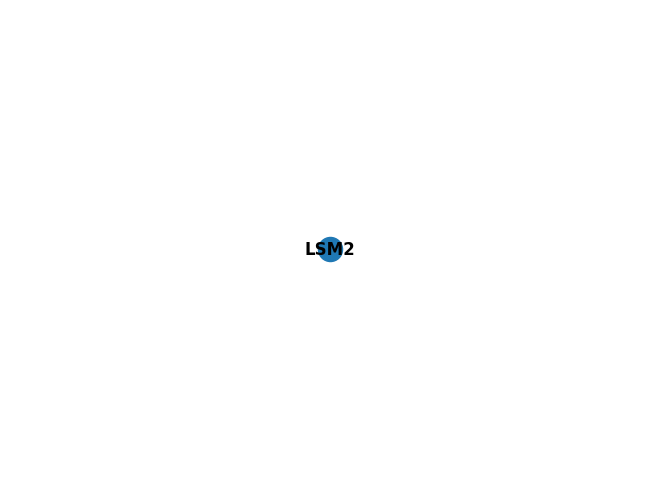

In [268]:
center = nx.center(LCC_bio)
print("center: ", center)

nx.draw(LCC_bio.subgraph(center), with_labels=True, font_weight='bold')

### Periphery

The priphery is the set of nodes with maximum eccentricity (i.e. eccentricity equal to the diameter).

periphery:  ['SYP', 'ADAM15', 'AP1B1']


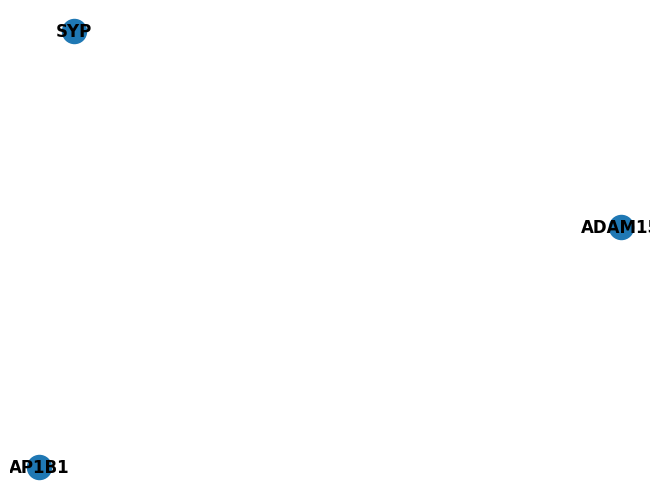

In [269]:
per = nx.periphery(LCC_bio)
print("periphery: ", per)

nx.draw(LCC_bio.subgraph(per), with_labels=True, font_weight='bold')

### Density

It represents the ratio between the edges present in a graph and the maximum number of edges that the graph can contain.

It is computed with:

$\frac{2m}{(n(n-1))}$ for **undirected** graph.
    
$\frac{m}{(n(n-1))}$ for **directed** graph.

> **EXERCISE**
>
> Compute the density for the `LCC_bio` *undirected* graph

In [283]:
# @title 👩‍💻 Exercise

# Your solution here...
num = 2*len(LCC_bio.edges)
den = len(LCC_bio.nodes)*(len(LCC_bio.nodes)-1)

density = num/den

print(density)


0.013572267920094007


In [284]:
# @title ⚡ Built-in function

density = nx.density(LCC_bio)
print("density: ", density)

density:  0.013572267920094007


# Export network
Finally we see how to export a graph. NetworkX consents to export graphs using multiple formats (click [here](https://networkx.org/documentation/stable/reference/readwrite/index.html) for more details). In this tutorial we see how to export graphs as as **edge_list** or as **adjacency_matrix**.

## Export as edge list

In [285]:
nx.write_edgelist(LCC_bio, path="LCC_bio_edgelist.txt", data=True)

## Export as adjacency matrix
Export adjacency matrix as text (cumbersome, but may be needed by several external programs).

In [286]:
# Get adjacency matrix.
LCC_bio_adj = nx.adjacency_matrix(LCC_bio)

print("Adjacency matrix in compact notation:\n\n", LCC_bio_adj, end="\n\n")

# Convert it to array.
LCC_bio_adj = LCC_bio_adj.toarray()
print("Adjacency matrix as array:\n\n", LCC_bio_adj, end="\n\n")

Adjacency matrix in compact notation:

   (0, 82)	1
  (1, 45)	1
  (2, 45)	1
  (3, 150)	1
  (4, 31)	1
  (5, 146)	1
  (6, 64)	1
  (6, 110)	1
  (7, 110)	1
  (7, 130)	1
  (7, 146)	1
  (8, 183)	1
  (9, 45)	1
  (10, 106)	1
  (10, 130)	1
  (10, 146)	1
  (11, 41)	1
  (12, 158)	1
  (13, 16)	1
  (13, 37)	1
  (13, 38)	1
  (13, 84)	1
  (13, 88)	1
  (13, 123)	1
  (13, 125)	1
  :	:
  (177, 44)	1
  (177, 174)	1
  (178, 27)	1
  (178, 100)	1
  (178, 110)	1
  (178, 130)	1
  (178, 133)	1
  (178, 143)	1
  (178, 182)	1
  (179, 44)	1
  (180, 168)	1
  (181, 131)	1
  (182, 106)	1
  (182, 110)	1
  (182, 130)	1
  (182, 146)	1
  (182, 150)	1
  (182, 178)	1
  (183, 8)	1
  (183, 94)	1
  (183, 97)	1
  (183, 153)	1
  (184, 45)	1
  (184, 82)	1
  (184, 131)	1

Adjacency matrix as array:

 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



In [287]:
import numpy as np

# Export adjacency matrix.
np.savetxt("adj_bio.txt", LCC_bio_adj)